Numpy assignment - Tasmanian devil

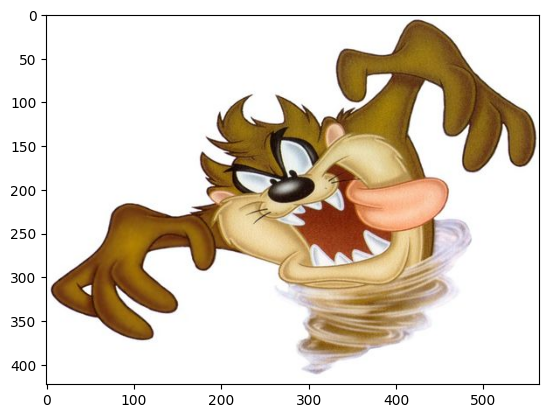

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

loc_input_img = os.path.join('..', 'data', 'input', 'tasmanian_devil.jpeg')
img = Image.open(loc_input_img)
tasman_devil = np.array(img)
plt.imshow(tasman_devil)
plt.show()

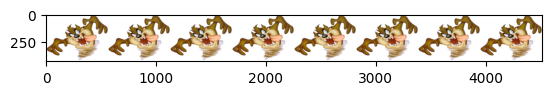

In [45]:
# Visualize 3 by 8
tasman_3_by_8 = np.tile(tasman_devil, (1, 8, 1))
plt.imshow(tasman_3_by_8) 
plt.show()

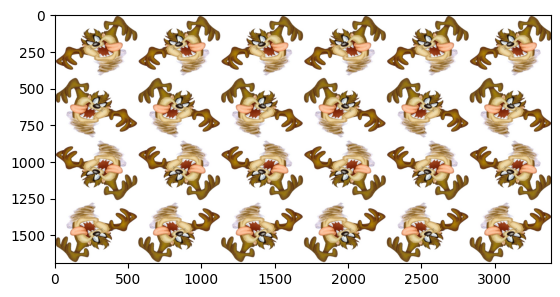

In [46]:
# Visualize 6 by 4 - flipping horizontal & vertical

# create row of 6 x original devil
tasman_6_upper_right = np.tile(tasman_devil, (1, 6, 1))

# create row of 6x horizontally flipped devil
tasman_flipped_lr = tasman_devil[:, ::-1, :]
tasman_6_upper_left = np.tile(tasman_flipped_lr, (1, 6, 1))

# create row of 6x upside down original devil
tasman_dev_upside_down = tasman_devil[::-1, :, :]
tasman_6_upside_down = np.tile(tasman_dev_upside_down, (1, 6, 1))

# create row of 6x flipped horizontally upside down original devil
tasman_dev_flipped_upside_down = tasman_flipped_lr[::-1, :, :]
tasman_6_flipped_upside_down = np.tile(tasman_dev_flipped_upside_down, (1, 6, 1))

# stack rows & show image
tasman_stacked = np.vstack([tasman_6_upper_right, tasman_6_upper_left, tasman_6_upside_down, tasman_6_flipped_upside_down])
plt.imshow(tasman_stacked) 
plt.show()


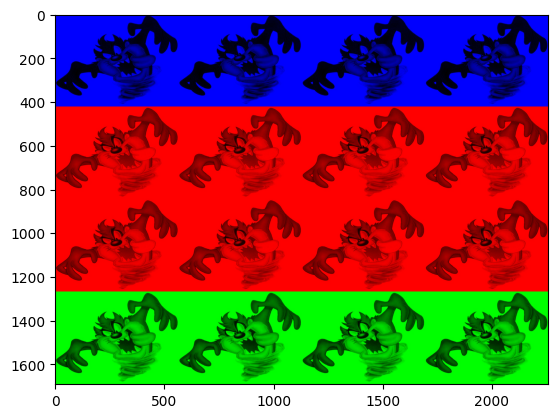

In [63]:
# Matrix wil colourfull tiles

# Create red devil
red_devil = tasman_devil.copy()
red_devil[:,:,[1,2]] = 0

# Create blue devil
blue_devil = tasman_devil.copy()
blue_devil[:,:,[0, 1]] = 0

# Create green devil
green_devil = tasman_devil.copy()
green_devil[:,:,[0, 2]] = 0

# Create row of 4 x blue devil
tasman_4_blue = np.tile(blue_devil, (1, 4, 1))

# Create row of 4 x red devil
tasman_4_red = np.tile(red_devil, (1, 4, 1))

# Create row of 4 x green devil
tasman_4_green = np.tile(green_devil, (1, 4, 1))

# stack colourfull rows & show image
tasman_stacked_colourfull = np.vstack([tasman_4_blue, tasman_4_red, tasman_4_red, tasman_4_green])
plt.imshow(tasman_stacked_colourfull) 
plt.show()
